# Import Library


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

## Import Data

In [2]:
df=pd.read_csv("Jantungafteroutlier.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,20.34,0,0,1,0,0,0,1,13,1,0,1,2,7,0,0,0
1,0,26.58,1,0,0,20,30,0,0,10,1,1,1,4,8,1,0,0
2,0,23.71,0,0,0,28,0,1,1,5,1,0,1,2,8,0,0,0
3,1,28.87,1,0,0,6,0,1,1,12,2,0,0,4,12,0,0,0
4,0,31.64,1,0,0,5,0,1,1,13,1,1,0,3,9,1,0,0


In [3]:
# Memanggil 25 data dari keseluruhan data
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,20.34,0,0,1,0,0,0,1,13,1,0,1,2,7,0,0,0
1,0,26.58,1,0,0,20,30,0,0,10,1,1,1,4,8,1,0,0
2,0,23.71,0,0,0,28,0,1,1,5,1,0,1,2,8,0,0,0
3,1,28.87,1,0,0,6,0,1,1,12,2,0,0,4,12,0,0,0
4,0,31.64,1,0,0,5,0,1,1,13,1,1,0,3,9,1,0,0


In [4]:
print(df.isnull().sum())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


## Data Understanding


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289976 entries, 0 to 289975
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      289976 non-null  int64  
 1   BMI               289976 non-null  float64
 2   Smoking           289976 non-null  int64  
 3   AlcoholDrinking   289976 non-null  int64  
 4   Stroke            289976 non-null  int64  
 5   PhysicalHealth    289976 non-null  int64  
 6   MentalHealth      289976 non-null  int64  
 7   DiffWalking       289976 non-null  int64  
 8   Sex               289976 non-null  int64  
 9   AgeCategory       289976 non-null  int64  
 10  Race              289976 non-null  int64  
 11  Diabetic          289976 non-null  int64  
 12  PhysicalActivity  289976 non-null  int64  
 13  GenHealth         289976 non-null  int64  
 14  SleepTime         289976 non-null  int64  
 15  Asthma            289976 non-null  int64  
 16  KidneyDisease     28

In [6]:
print ("Data Shape: ", df.shape)

Data Shape:  (289976, 18)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289976 entries, 0 to 289975
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      289976 non-null  int64  
 1   BMI               289976 non-null  float64
 2   Smoking           289976 non-null  int64  
 3   AlcoholDrinking   289976 non-null  int64  
 4   Stroke            289976 non-null  int64  
 5   PhysicalHealth    289976 non-null  int64  
 6   MentalHealth      289976 non-null  int64  
 7   DiffWalking       289976 non-null  int64  
 8   Sex               289976 non-null  int64  
 9   AgeCategory       289976 non-null  int64  
 10  Race              289976 non-null  int64  
 11  Diabetic          289976 non-null  int64  
 12  PhysicalActivity  289976 non-null  int64  
 13  GenHealth         289976 non-null  int64  
 14  SleepTime         289976 non-null  int64  
 15  Asthma            289976 non-null  int64  
 16  KidneyDisease     28

In [8]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.0
mean,0.077224,28.393972,0.407113,0.068557,0.034799,3.265391,3.983602,0.131680,0.526878,7.213280,1.749265,0.190281,0.775540,2.388036,7.078072,0.134104,0.033099,0.0
std,0.266946,6.425643,0.491297,0.252700,0.183272,7.809927,8.010688,0.338143,0.499278,3.539096,1.492525,0.495650,0.417227,1.038344,1.436614,0.340765,0.178896,0.0
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.0
50%,0.000000,27.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,1.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.0
75%,0.000000,31.570000,1.000000,0.000000,0.000000,2.000000,4.000000,0.000000,1.000000,10.000000,2.000000,0.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.0
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,3.000000,1.000000,5.000000,24.000000,1.000000,1.000000,0.0


In [9]:
df.HeartDisease.value_counts()

HeartDisease
0    267583
1     22393
Name: count, dtype: int64

In [10]:
# Menghitung jumlah masing-masing kelas
class_counts = df['HeartDisease'].value_counts()

# Menampilkan jumlah masing-masing kelas
print("Jumlah masing-masing kelas:")
print(class_counts)

# Mengidentifikasi kelas mayoritas dan minoritas
kelas_mayoritas = class_counts.max()
kelas_minoritas = class_counts.min()

# Menghitung rasio ketidakseimbangan
rasio_ketidakseimbangan = kelas_minoritas / kelas_mayoritas

# Menampilkan rasio ketidakseimbangan
print("\nRasio ketidakseimbangan:")
print(rasio_ketidakseimbangan)

Jumlah masing-masing kelas:
HeartDisease
0    267583
1     22393
Name: count, dtype: int64

Rasio ketidakseimbangan:
0.08368618335245513


##Cleaning Data

In [11]:
df.duplicated().sum()
##print(duplicated)

17551

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

#print(duplicated)

0

In [14]:
df.HeartDisease.value_counts()


HeartDisease
0    250132
1     22293
Name: count, dtype: int64

In [15]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [16]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,20.34,0,0,1,0,0,0,1,13,1,0,1,2,7,0,0,0
1,0,26.58,1,0,0,20,30,0,0,10,1,1,1,4,8,1,0,0
2,0,23.71,0,0,0,28,0,1,1,5,1,0,1,2,8,0,0,0
3,1,28.87,1,0,0,6,0,1,1,12,2,0,0,4,12,0,0,0
4,0,31.64,1,0,0,5,0,1,1,13,1,1,0,3,9,1,0,0


## Exploratory Data Analysis (EDA)

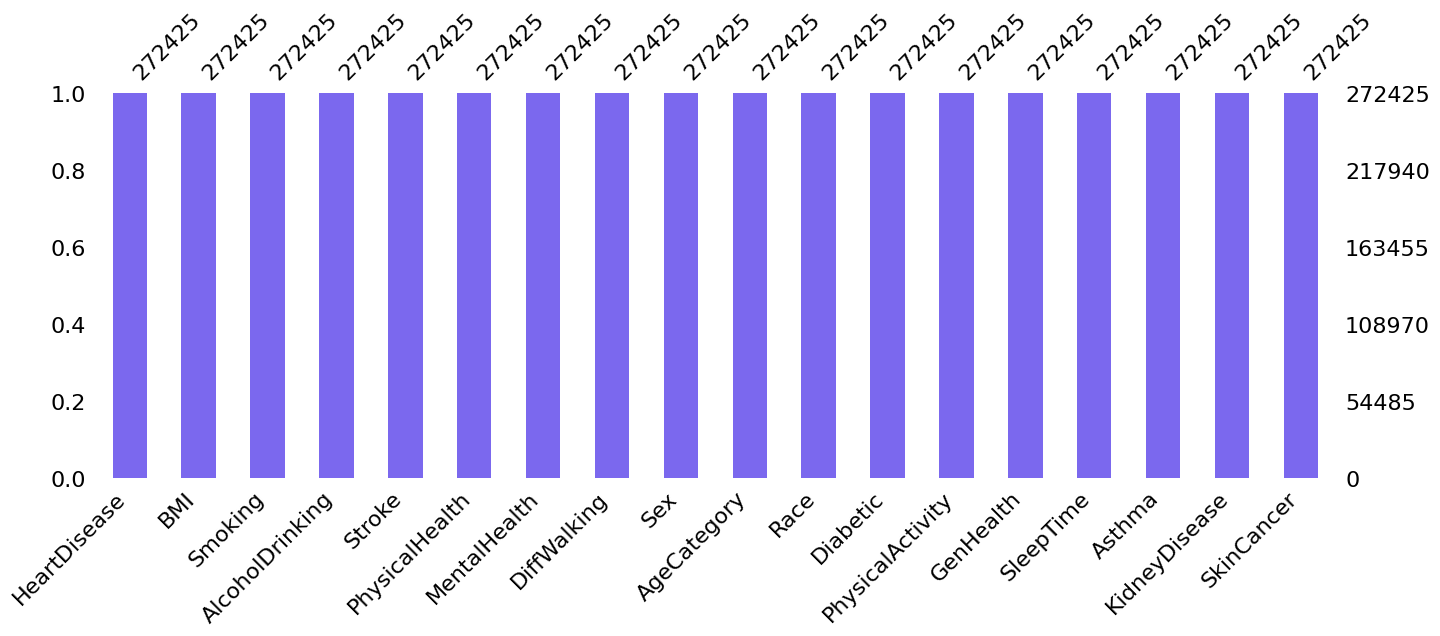

In [17]:
msno.bar(df, figsize = (16,5),color = "#7B68EE")
plt.show()

In [18]:
#gambaran mengenai distribusi nilai dalam setiap kolom
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,unique_values=unique_values))

Feature 'HeartDisease' has '2' unique values
Feature 'BMI' has '3569' unique values
Feature 'Smoking' has '2' unique values
Feature 'AlcoholDrinking' has '2' unique values
Feature 'Stroke' has '2' unique values
Feature 'PhysicalHealth' has '31' unique values
Feature 'MentalHealth' has '31' unique values
Feature 'DiffWalking' has '2' unique values
Feature 'Sex' has '2' unique values
Feature 'AgeCategory' has '13' unique values
Feature 'Race' has '6' unique values
Feature 'Diabetic' has '4' unique values
Feature 'PhysicalActivity' has '2' unique values
Feature 'GenHealth' has '5' unique values
Feature 'SleepTime' has '24' unique values
Feature 'Asthma' has '2' unique values
Feature 'KidneyDisease' has '2' unique values
Feature 'SkinCancer' has '1' unique values


Terlihat terdapat data outlier pada variabel BMI, namun karena data BMI ini penting jadi tidak akan di hapus data outlier ini

## Transformasi Data

In [19]:
# Scaling
## membantu meningkatkan performa model machine learning dan mempermudah interpretasi hasil model
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
print(scaled_df)

[[-0.29853801 -1.24976316 -0.84632003 ... -0.40672427 -0.19106671
   0.        ]
 [-0.29853801 -0.29671238  1.18158612 ...  2.45866814 -0.19106671
   0.        ]
 [-0.29853801 -0.73505465 -0.84632003 ... -0.40672427 -0.19106671
   0.        ]
 ...
 [-0.29853801 -0.65410642 -0.84632003 ... -0.40672427 -0.19106671
   0.        ]
 [-0.29853801  0.65481108 -0.84632003 ... -0.40672427 -0.19106671
   0.        ]
 [-0.29853801  2.75488291 -0.84632003 ... -0.40672427 -0.19106671
   0.        ]]


UNDERSAMPLING

C:\Users\M S I\AppData\Local\Temp\ipykernel_1168\1611175011.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease',data=df, palette='pastel')


<Axes: xlabel='HeartDisease', ylabel='count'>

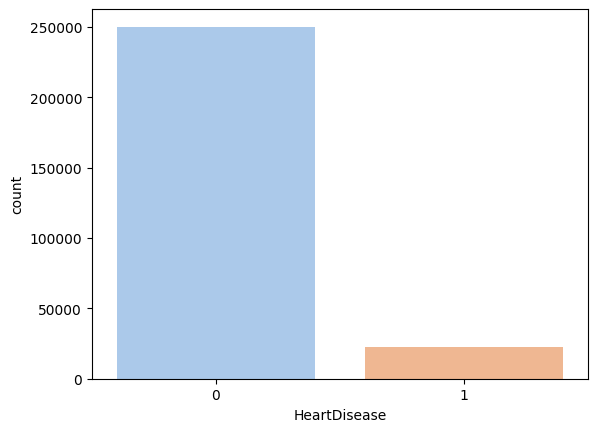

In [20]:
sns.countplot(x='HeartDisease',data=df, palette='pastel')

In [21]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler


# Separate features and target
X = df.drop('HeartDisease', axis=1)  # Replace 'target_column' with your target column name
y = df['HeartDisease']

# Create an undersampler object
rus = RandomUnderSampler(random_state=42)

# Fit and apply undersampling to the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create a new DataFrame with the undersampled data
undersampled_data = pd.DataFrame(X_resampled, columns=X.columns)
undersampled_data['HeartDisease'] = y_resampled

# Print the class distribution in the undersampled data
print(undersampled_data['HeartDisease'].value_counts())

HeartDisease
0    22293
1    22293
Name: count, dtype: int64


In [22]:
# sebelum smote
print(X.shape)
print(y.shape)

(272425, 17)
(272425,)


In [23]:
# jumlah data setelah dilakukan undersampling
print(X_resampled.shape)
print(y_resampled.shape)

(44586, 17)
(44586,)


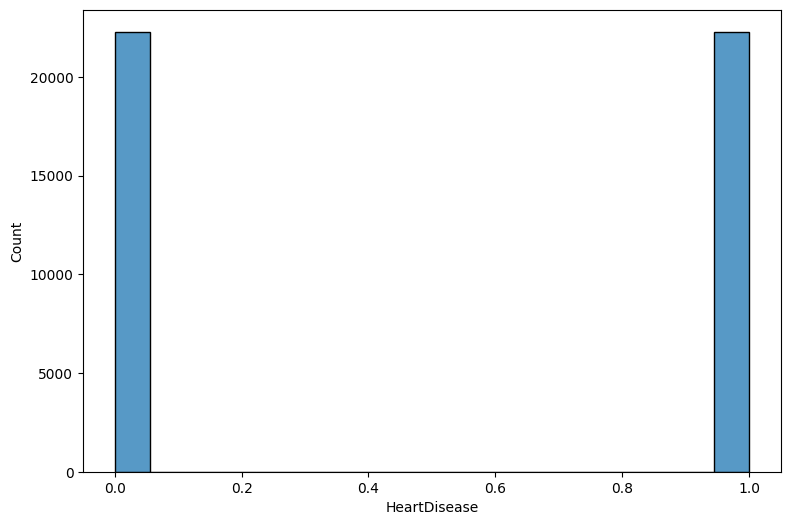

In [24]:
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=y_resampled)
plt.show()


In [25]:
# Menghitung jumlah masing-masing kelas
class_counts = df['HeartDisease'].value_counts()

# Menampilkan jumlah masing-masing kelas
print("Jumlah masing-masing kelas:")
print(class_counts)

# Menghitung rasio
total = class_counts.sum()
class_ratios = class_counts / total

# Menampilkan rasio
print("\nRasio masing-masing kelas:")
print(class_ratios)

# Menampilkan rasio dalam bentuk persentase
print("\nRasio masing-masing kelas (dalam persen):")
print(class_ratios * 100)

Jumlah masing-masing kelas:
HeartDisease
0    250132
1     22293
Name: count, dtype: int64

Rasio masing-masing kelas:
HeartDisease
0    0.918168
1    0.081832
Name: count, dtype: float64

Rasio masing-masing kelas (dalam persen):
HeartDisease
0    91.81683
1     8.18317
Name: count, dtype: float64


##Metode berhasil diterapkan, saat ini data penderita penyakit jantung sudah sama dengan yang tidak menderita penyakit jantung

## split data


In [26]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

print("X : ", X_resampled.shape)
print("y : ", y_resampled.shape)


X :  (44586, 17)
y :  (44586,)


In [27]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [28]:
scaler = StandardScaler()

# Fit the scaler on the resampled data
scaler.fit(X_resampled)

# Transform the resampled data using the fitted scaler
X_transformed = scaler.transform(X_resampled)


In [29]:
from sklearn.model_selection import train_test_split

# Tentukan ukuran test set (misal: 20%)
test_size = 0.2

# Split data menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=100)


## Modelling SVM (support vector machine)

In [30]:

clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      4433
           1       0.75      0.80      0.77      4485

    accuracy                           0.76      8918
   macro avg       0.77      0.76      0.76      8918
weighted avg       0.77      0.76      0.76      8918

Akurasi SVM : 76.44%


Confusion Matrix:
[[3230 1203]
 [ 898 3587]]


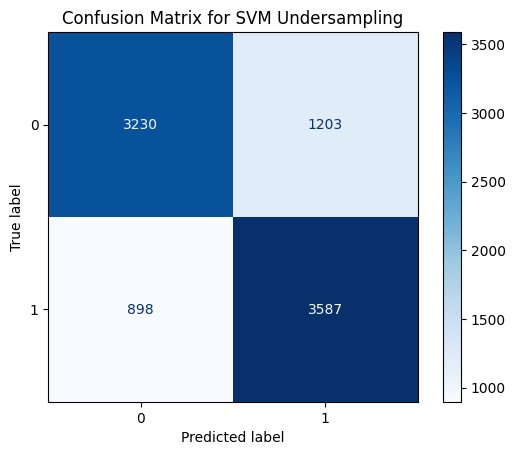

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan Confusion Matrix dalam Bentuk Teks
print("Confusion Matrix:")
print(cm)

# Visualisasi Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM Undersampling")
plt.show()

In [32]:
clf = SVC(kernel = 'poly' , degree=3, C=1.0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      4433
           1       0.75      0.77      0.76      4485

    accuracy                           0.76      8918
   macro avg       0.76      0.76      0.76      8918
weighted avg       0.76      0.76      0.76      8918

Akurasi SVM : 75.52%


In [33]:
clf = SVC(kernel = 'sigmoid' , gamma=1.0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      4433
           1       0.00      0.00      0.00      4485

    accuracy                           0.50      8918
   macro avg       0.25      0.50      0.33      8918
weighted avg       0.25      0.50      0.33      8918

Akurasi SVM : 49.71%


c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [34]:
clf = SVC(kernel = 'rbf' , gamma=0.1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73      4433
           1       0.72      0.80      0.76      4485

    accuracy                           0.75      8918
   macro avg       0.75      0.75      0.75      8918
weighted avg       0.75      0.75      0.75      8918

Akurasi SVM : 74.73%


Tanpa Tuning

In [35]:
# Model tanpa tuning
model_default = SVC()  # Default parameters
model_default.fit(X_train, y_train)
y_test_pred_default = model_default.predict(X_test)
default_accuracy = accuracy_score(y_test, y_test_pred_default)
print("Default Model Test Accuracy:", default_accuracy)


Default Model Test Accuracy: 0.760708679076026


HYPERPARAMETER TUNING

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the parameter grid for tuning
param_grid = [
    {'kernel': ['linear'], 'C': [0.01, 0.1, 1]},
    {'kernel': ['rbf'], 'C': [0.01, 0.1, 1], 'gamma': [0.01, 0.1, 1]}
]

# Initialize variables to track the best parameters and model
best_params = None
best_model = None
best_accuracy = -np.inf  # Start with a very low accuracy

# Iterate over parameter combinations manually
for params in param_grid:
    kernel = params['kernel'][0]
    C_values = params['C']
    gamma_values = params.get('gamma', [None])  # Default to None for linear kernel
    
    for C in C_values:
        for gamma in gamma_values:
            # Initialize the model with current parameters
            if kernel == 'linear':
                model = SVC(kernel=kernel, C=C)
            else:  # For rbf kernel
                model = SVC(kernel=kernel, C=C, gamma=gamma)
            
            # Fit the model on the training data
            model.fit(X_train, y_train)
            
            # Evaluate the model on the test set
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            
            # Update the best model if the current model performs better
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'kernel': kernel, 'C': C}
                if kernel == 'rbf':
                    best_params['gamma'] = gamma
                best_model = model

# Print the best parameters found
print("Best Parameters:", best_params)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", best_accuracy)


Best Parameters: {'kernel': 'linear', 'C': 1}
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      4433
           1       0.75      0.80      0.77      4485

    accuracy                           0.76      8918
   macro avg       0.77      0.76      0.76      8918
weighted avg       0.77      0.76      0.76      8918

Accuracy: 0.7644090603274277


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Use the best parameters found earlier
kernel = best_params['kernel']
C = best_params['C']
gamma = best_params.get('gamma', None)

# Initialize the model with the best parameters
if kernel == 'linear':
    best_model = SVC(kernel=kernel, C=C)
else:  # For rbf kernel
    best_model = SVC(kernel=kernel, C=C, gamma=gamma)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=10)

# Print the cross-validation results
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.91818082 0.91818082 0.91814411 0.91814411 0.91814411 0.91817781
 0.91817781 0.91817781 0.91817781 0.91817781]
Mean cross-validation score: 0.9181683033772652


In [38]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for tuning
# param_grid = {
#     'C': [0.01, 0.1, 1],  # Regularization parameter
#     'kernel': ['linear']  # Using the default kernel
# }

# # Initialize the SVM model
# model = SVC()

# # Initialize GridSearchCV with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
#                            cv=5, scoring='accuracy', verbose=1)

# # Fit GridSearchCV on the training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters found
# print("Best Parameters:", grid_search.best_params_)

# # Evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# # Print classification report and accuracy
# print("Classification Report:")
# print(classification_report(y_test, y_pred))
# print("Accuracy:", accuracy_score(y_test, y_pred))

In [39]:
# from sklearn.model_selection import cross_val_score

# # Model terbaik dari Grid Search
# best_model = grid_search.best_estimator_

# # Evaluasi performa akhir menggunakan k-fold CV
# scores = cross_val_score(best_model, X, y, cv=10, scoring='accuracy', n_jobs=-1)
# print("Final Accuracy:", scores.mean())


In [40]:
#import numpy as np
#from sklearn.model_selection import cross_val_score, StratifiedKFold
#from sklearn.metrics import accuracy_score

# Asumsikan best_model dari hasil tuning sudah didefinisikan

# Set up K-fold cross-validation with 10 splits
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
#cv_results = cross_val_score(best_model, X_train, y_train, cv=kfold, scoring='accuracy')

# Display cross-validation results
#print("Cross-validation Accuracy Scores:", cv_results)
#print("Mean CV Accuracy:", np.mean(cv_results))
#print("Standard Deviation of CV Accuracy:", np.std(cv_results))

## mencetak model

In [54]:
import pickle
from sklearn.svm import SVC

# Contoh: Membuat model SVM
#model = SVC(kernel='rbf', C=1, gamma=0.1)

# Training model (gunakan dataset Anda sendiri)
# X_train dan y_train adalah dataset pelatihan Anda
# model.fit(X_train, y_train)

# Menyimpan model ke file .pkl
with open('model_svm_undersampling.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model berhasil disimpan ke file model_svm_undersampling.pkl")


Model berhasil disimpan ke file model_svm_undersampling.pkl


In [55]:
# Membaca model dari file .pkl
with open('model_svm_undersampling.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model berhasil dimuat kembali")
# Anda bisa menggunakan model ini untuk prediksi
# predictions = loaded_model.predict(X_test)


Model berhasil dimuat kembali


In [57]:
# Muat model dari file .pkl
with open('model_svm_undersampling.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Gunakan model untuk prediksi
predictions = loaded_model.predict(X_test)
print("Prediksi:", predictions)


Prediksi: [1 1 0 ... 1 0 0]


## Testing

In [41]:
new_data = {
    'BMI'	: [10.0],
    'Smoking'	: [1],
    'AlcoholDrinking' : [1],
    'Stroke'	: [1],
    'PhysicalHealth' : [9],
    'MentalHealth'	: [10],
    'DiffWalking'	: [1],
    'Sex'	: [1],
    'AgeCategory' : [12],
    'Race' : [1],
    'Diabetic' : [1],
    'PhysicalActivity' : [0],
    'GenHealth'	: [4],
    'SleepTime'	: [2],
    'Asthma'	: [1],
    'KidneyDisease'	: [1],
    'SkinCancer' : [1]
}

new_data = pd.DataFrame(new_data)
new_data

scaled_new_data = scaler.transform(new_data)
y_pred_new = clf.predict(scaled_new_data)

print("Diagnosis Data Baru : ", y_pred_new)

Diagnosis Data Baru :  [1]


c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [42]:
new_data = {
    'BMI'	: [34.3],
    'Smoking'	: [0],
    'AlcoholDrinking' : [0],
    'Stroke'	: [1],
    'PhysicalHealth' : [50],
    'MentalHealth'	: [50],
    'DiffWalking'	: [1],
    'Sex'	: [1],
    'AgeCategory' : [1],
    'Race' : [1],
    'Diabetic' : [0],
    'PhysicalActivity' : [1],
    'GenHealth'	: [2],
    'SleepTime'	: [5],
    'Asthma'	: [0],
    'KidneyDisease'	: [0],
    'SkinCancer' : [0]
}

new_data = pd.DataFrame(new_data)
new_data

scaled_new_data = scaler.transform(new_data)
y_pred_new = clf.predict(scaled_new_data)

print("Diagnosis Data Baru : ", y_pred_new)

Diagnosis Data Baru :  [1]


c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [43]:
import pickle

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
scaler.fit(X_train)
X = scaler.transform(X)

c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [46]:
data_diskalakan_uji = scaler.transform(X_test)

In [47]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Assuming you have your training and testing data (X_train, X_test, y_train, y_test)

# Create the model pipeline
model_numpy = make_pipeline(StandardScaler(), LinearSVC())

# Train the model
model_numpy.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_numpy.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Save the trained model (replace with your preferred filename)
with open("model_numpy.pkl", "wb") as model_file:
    pickle.dump(model_numpy, model_file)


c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.77      0.74      0.75      4433
           1       0.75      0.79      0.77      4485

    accuracy                           0.76      8918
   macro avg       0.76      0.76      0.76      8918
weighted avg       0.76      0.76      0.76      8918



c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [48]:
import pickle
from sklearn.svm import SVC

# Contoh: Membuat model SVM
model = SVC(kernel='rbf', C=1, gamma=0.1)

# Training model (gunakan dataset Anda sendiri)
# X_train dan y_train adalah dataset pelatihan Anda
# model.fit(X_train, y_train)

# Menyimpan model ke file .pkl
with open('model_svm.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model berhasil disimpan ke file model_svm.pkl")


Model berhasil disimpan ke file model_svm.pkl


In [49]:
# Membaca model dari file .pkl
with open('model_svm.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model berhasil dimuat kembali")
# Anda bisa menggunakan model ini untuk prediksi
# predictions = loaded_model.predict(X_test)


Model berhasil dimuat kembali


In [50]:
#load model
with open('model_numpy.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

In [51]:
# Tanpa tuning, gunakan model default
svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)

# Dapatkan probabilitas prediksi
y_prob_svm = svm_clf.predict_proba(X_test)[:, 1]

# Simpan ke file .csv
results_svm = pd.DataFrame({
    'y_test': y_test,
    'y_prob': y_prob_svm
})
results_svm.to_csv('svm_default_results.csv', index=False)

print("Hasil dengan model default disimpan ke 'svm_default_results.csv'")


Hasil dengan model default disimpan ke 'svm_default_results.csv'


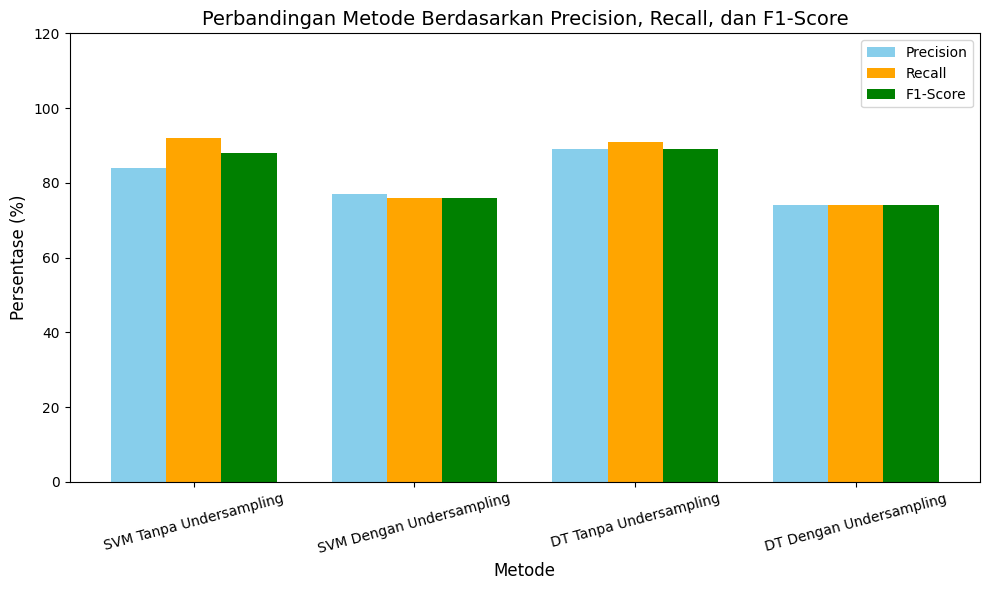

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Data dari tabel
methods = ['SVM Tanpa Undersampling', 'SVM Dengan Undersampling', 
           'DT Tanpa Undersampling', 'DT Dengan Undersampling']
precision = [84, 77, 89, 74]
recall = [92, 76, 91, 74]
f1_score = [88, 76, 89, 74]

x = np.arange(len(methods))  # Posisi untuk setiap metode
width = 0.25  # Lebar batang

# Membuat grafik batang
plt.figure(figsize=(10, 6))
plt.bar(x - width, precision, width, label='Precision', color='skyblue')
plt.bar(x, recall, width, label='Recall', color='orange')
plt.bar(x + width, f1_score, width, label='F1-Score', color='green')

# Menambahkan label dan judul
plt.xlabel('Metode', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
plt.title('Perbandingan Metode Berdasarkan Precision, Recall, dan F1-Score', fontsize=14)
plt.xticks(x, methods, rotation=15, fontsize=10)
plt.ylim(0, 120)
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()


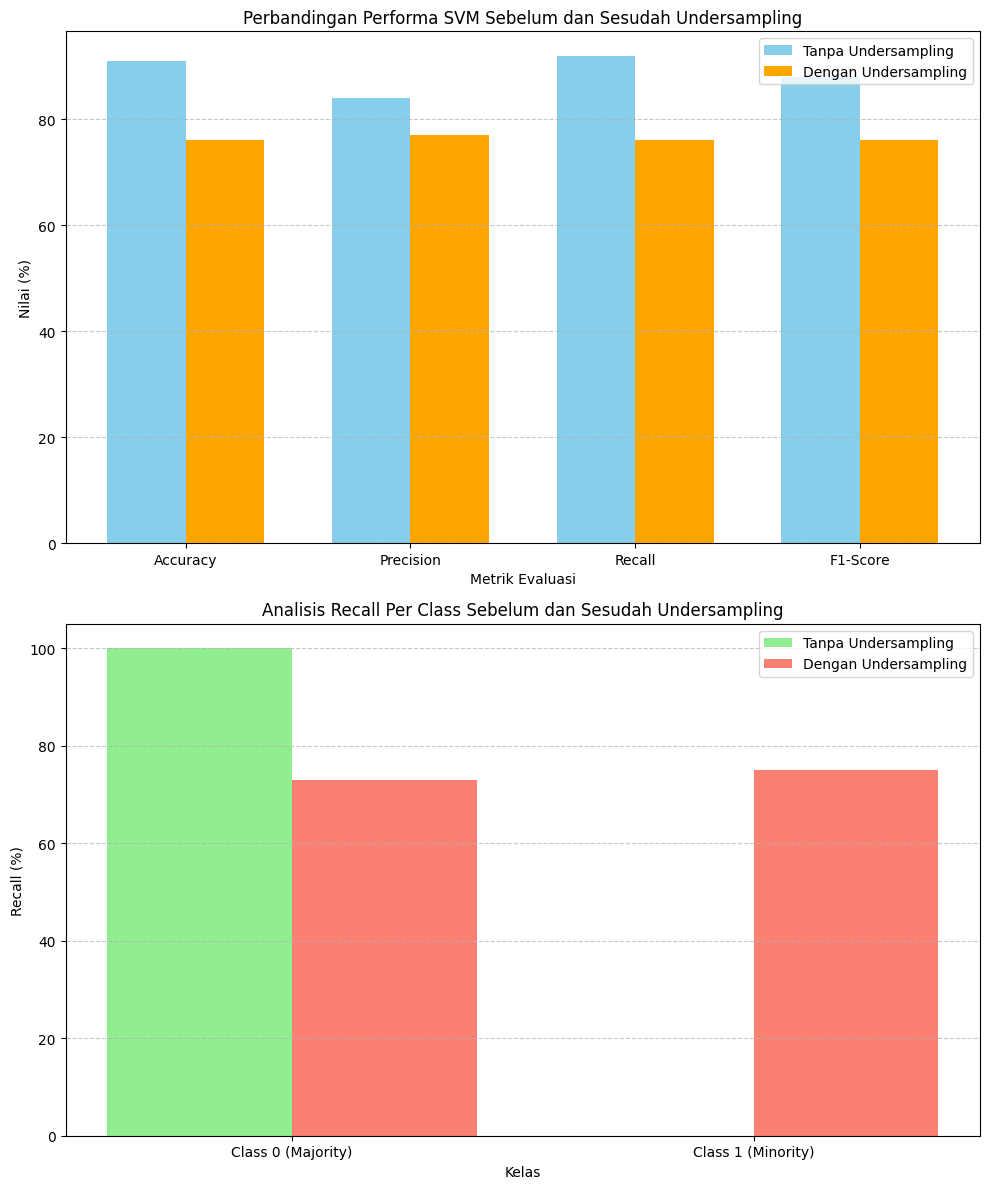

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Data untuk SVM
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
svm_no_undersampling = [91, 84, 92, 88]
svm_with_undersampling = [76, 77, 76, 76]

# Data tambahan untuk analisis per class
classes = ['Class 0 (Majority)', 'Class 1 (Minority)']
recall_no_undersampling = [100, 0]  # Recall per class tanpa undersampling
recall_with_undersampling = [73, 75]  # Recall per class dengan undersampling

# Grafik pertama: Perbandingan metrik utama sebelum dan sesudah undersampling
x = np.arange(len(metrics))  # Label posisi x
width = 0.35  # Lebar bar

fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Bar chart metrik utama
ax[0].bar(x - width/2, svm_no_undersampling, width, label='Tanpa Undersampling', color='skyblue')
ax[0].bar(x + width/2, svm_with_undersampling, width, label='Dengan Undersampling', color='orange')

# Pengaturan grafik pertama
ax[0].set_xlabel('Metrik Evaluasi')
ax[0].set_ylabel('Nilai (%)')
ax[0].set_title('Perbandingan Performa SVM Sebelum dan Sesudah Undersampling')
ax[0].set_xticks(x)
ax[0].set_xticklabels(metrics)
ax[0].legend()
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Grafik kedua: Analisis recall per class
x_classes = np.arange(len(classes))
width_classes = 0.4

ax[1].bar(x_classes - width_classes/2, recall_no_undersampling, width_classes, label='Tanpa Undersampling', color='lightgreen')
ax[1].bar(x_classes + width_classes/2, recall_with_undersampling, width_classes, label='Dengan Undersampling', color='salmon')

# Pengaturan grafik kedua
ax[1].set_xlabel('Kelas')
ax[1].set_ylabel('Recall (%)')
ax[1].set_title('Analisis Recall Per Class Sebelum dan Sesudah Undersampling')
ax[1].set_xticks(x_classes)
ax[1].set_xticklabels(classes)
ax[1].legend()
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan grafik
plt.tight_layout()
plt.show()
